# KMeans Unsupervised Learning  

## Problem Statement :-
### From The Given "iris" Dataset, Predict The Optimum Number Of Clusters And Represent it Visually.

# CODE

## IMPORTING THE PACKAGES

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,confusion_matrix
from collections import Counter
%matplotlib inline

## LOADING THE DATASET

In [2]:
data=pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## BASIC CHECKS

In [3]:
data.shape

(150, 5)

In [4]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [5]:
Counter(data.target)

Counter({0: 50, 1: 50, 2: 50})

## DEFINING X 

In [6]:
X=data.iloc[:,:-1]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# DEFINING THE MODEL AND FINDING THE ACCURACY

In [7]:
model=KMeans(n_clusters=3,random_state=9)
model.fit(X)
model.labels_
accuracy_score(data.target,model.labels_)

0.8933333333333333

In [8]:
pd.crosstab(data.target,model.labels_)

col_0,0,1,2
target,,,
0,50,0,0
1,0,48,2
2,0,14,36


# VISUALIZATION

Text(0.5, 1.0, 'This is Actual Dataset')

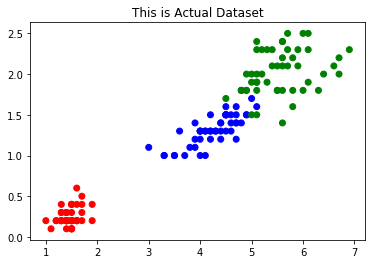

In [9]:
color=np.array(['red','blue','green'])
plt.scatter(x=data.petal_length,y=data.petal_width,c=color[data.target])
plt.title("This is Actual Dataset")

Text(0.5, 1.0, 'Predicted')

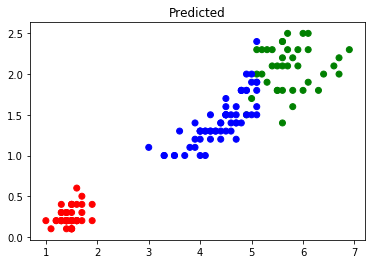

In [10]:
color=np.array(['red','blue','green'])
plt.scatter(x=data.petal_length,y=data.petal_width,c=color[model.labels_])
plt.title("Predicted")

## ELBOW TECHNIQUE

In [11]:
from scipy.spatial.distance import cdist
X=data.iloc[:,[2,3]]

In [12]:
distorsions=[]
K=range(1,17)
for k in K:
    kmeanModel=KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distorsions.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1))/X.shape[0])

In [13]:
X.shape[0]

150

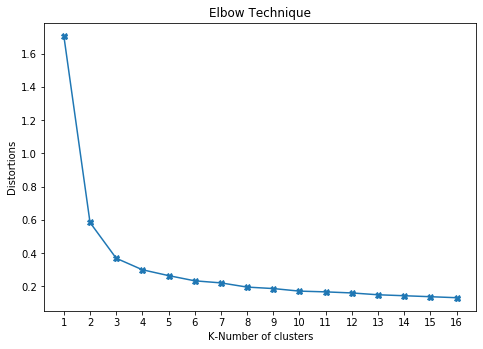

In [14]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_xticks(range(1,25))
ax.set_xlabel('K-Number of clusters')
ax.set_ylabel('Distortions')
ax.set_title('Elbow Technique')
ax.plot(K,distorsions,marker='X')
plt.show()